In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import LSTM
from tensorflow.keras import regularizers
from math import sqrt
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
from numpy import concatenate
import numpy as np
import tensorflow as tf
import random as rn
import numpy as np
from numpy import split
from numpy import array
from pandas import read_csv

from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import seaborn as sns
sns.set()

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False


import warnings
warnings.filterwarnings("ignore")

In [29]:
excel_file = 'Data.xlsx'
WOPR = pd.read_excel(excel_file, 1)
#NAMES = pd.read_excel(excel_file, 8)
total_field = pd.read_excel(excel_file, 10)
total_field


df = total_field
wopr=np.array(WOPR)
number=list()
for row in wopr:
    well=0
    for val in row:
        
        if val>0:
            well+=1
        else: well+=0
    numeber = number.append(well)
    number
number_of_prod_wells = pd.Series((n for n in number))
a=number_of_prod_wells.isnull().sum()
print('the number of nan is ',a)
#number_of_prod_wells
df['number'] = number_of_prod_wells
Time = df.Time
df = df.set_index('Time')
#data  = df[1:]
df = df[['WWIR', 'WWPR', 'WWCT', 'WGOR', 'WGPR', 'WBHP', 'WGIR', 'number', 'WOPR']]

the number of nan is  0


In [30]:
df

,WWIR,WWPR,WWCT,WGOR,WGPR,WBHP,WGIR,number,WOPR
Time,,,,,,,,,
0.0000,0.000,0.000000,0.000000,0.00000,0.000000e+00,809.17371,0.0000,0,0.000000
1.0000,0.000,4.254708,0.000971,108.75953,4.762375e+05,765.11941,0.0000,2,4378.811500
4.0000,0.000,4.225478,0.000964,108.71009,4.761076e+05,762.55516,0.0000,2,4379.608400
8.0000,0.000,4.350357,0.000992,108.65411,4.759481e+05,760.00822,0.0000,2,4380.397000
16.5000,0.000,5.632184,0.000989,108.56667,6.179193e+05,744.72472,392180.9700,2,5691.611800
...,...,...,...,...,...,...,...,...,...
3300.1875,14237.022,12582.943871,6.017298,43743.91988,2.819538e+06,6315.29708,208381.1344,12,9535.396706
3302.9219,14237.022,12622.343143,6.036866,43554.05700,2.814165e+06,6304.16700,208381.1344,12,9513.793438
3306.3398,14237.022,12670.004074,6.060548,43243.38595,2.808755e+06,6293.35983,208381.1344,12,9481.340067


In [31]:
df.isnull().sum()

WWIR      0
WWPR      0
WWCT      0
WGOR      0
WGPR      0
WBHP      0
WGIR      0
number    0
WOPR      0
dtype: int64

In [32]:
def interval(df,month):
    dt1 = month*30
    dt2 = dt1+30
    MM =np.array(df[dt1:dt2].sum())
    return MM
dt=1
M=[]
for i in range(109):
    #print(i)
    #print(interval(df,dt))
    dt+=1
    M.append(interval(df,dt))
    
M=np.array(M)
print('shape of M', M.shape)
for i in M:
    dataset = pd.DataFrame(M, columns = df.columns)
del dataset['number'] 
dataset

shape of M (109, 9)


,WWIR,WWPR,WWCT,WGOR,WGPR,WBHP,WGIR,WOPR
0,0.0000,64.342928,0.011110,1289.89468,7.319034e+06,3723.265760,6.996131e+06,68097.363400
1,0.0000,2.293652,0.005446,987.47371,4.249211e+05,3077.429090,4.138223e+05,3869.360910
2,0.0000,71.858668,0.013805,1608.11461,8.088233e+06,4661.620080,9.128344e+06,75532.210300
3,0.0000,78.383116,0.012022,1379.35079,8.504642e+06,3783.111850,9.734881e+06,80114.726400
4,0.0000,204.400393,0.033041,4151.85952,2.408181e+07,9780.289000,2.680934e+07,209729.064200
...,...,...,...,...,...,...,...,...
104,156071.8611,114500.874918,31.977633,15814.48622,2.127223e+07,48519.557255,1.056561e+06,114037.787076
105,173840.6499,134320.309426,37.875876,12921.15497,2.427458e+07,54678.273245,1.033455e+07,121096.901286
106,101593.2523,68660.328856,22.986483,7442.44058,1.187344e+07,30557.902498,8.614174e+06,56919.785966
107,165909.9892,109172.050530,42.485088,393135.38898,2.642626e+07,57907.033190,1.127951e+07,87994.715649


In [33]:
#  total months is 3312/30 ~= 111

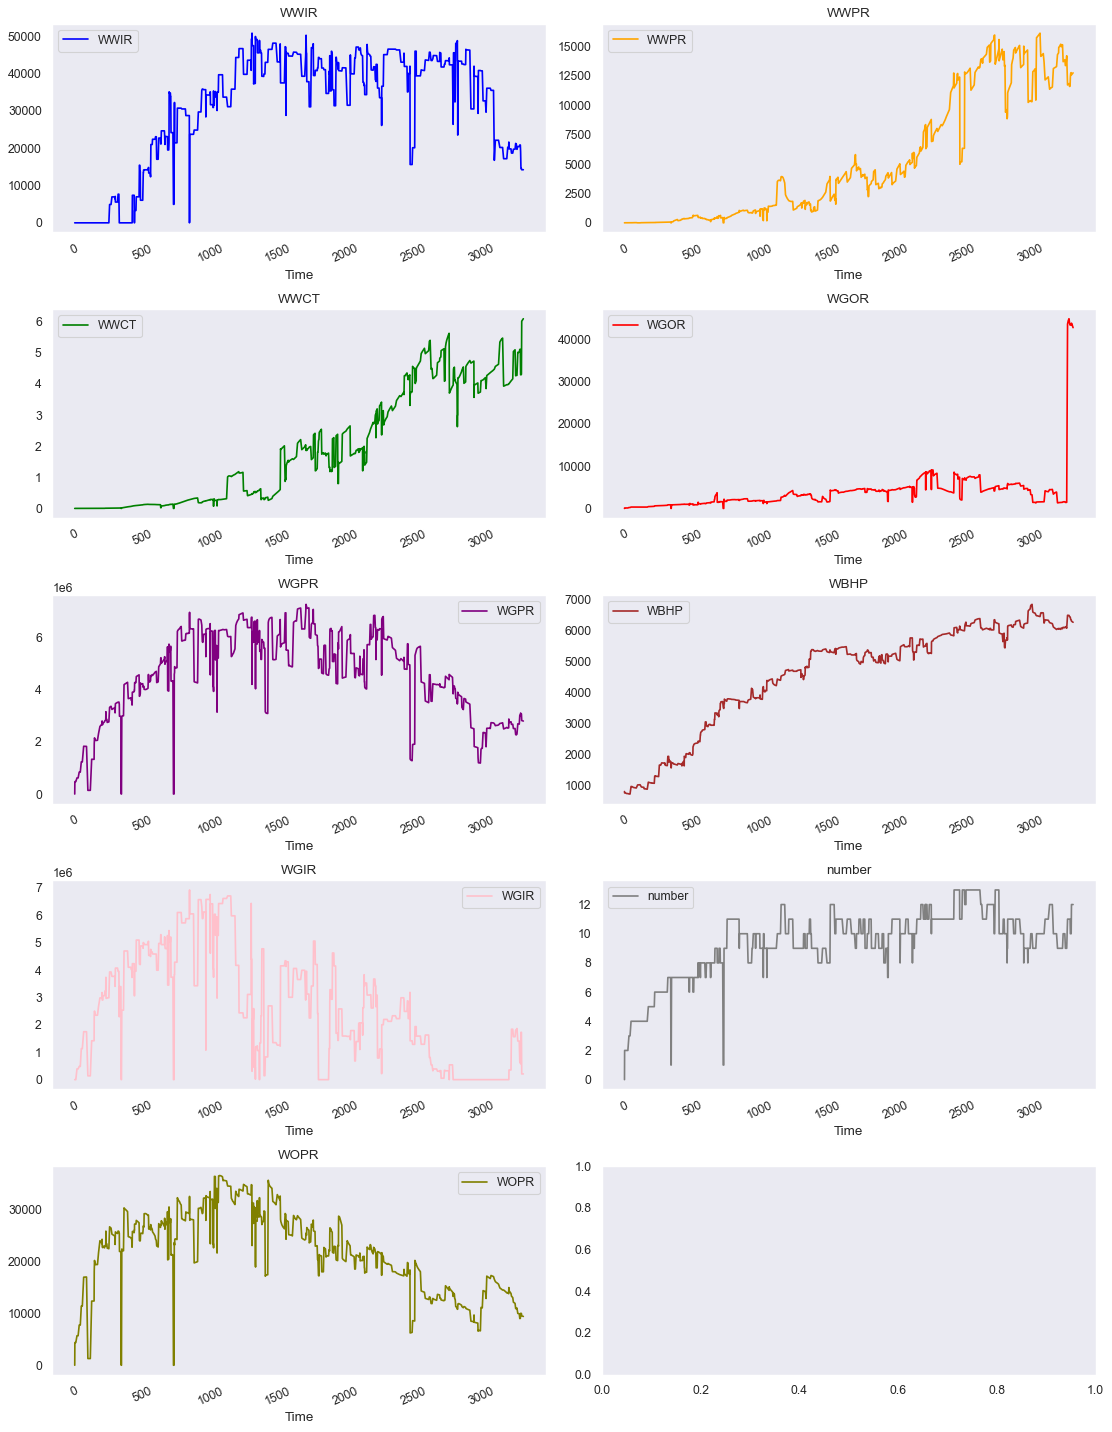

In [34]:
color_list = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]


def Visualize(data):
    features= list(data.select_dtypes(include=[np.number]).columns.values)
    feature_size=len(features)
    fig, axes = plt.subplots(
        nrows=int(np.ceil(feature_size/2)), ncols=2, figsize=(14, feature_size*2), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(feature_size):
        key = features[i]
        c = color_list[i % (len(color_list))]
        t_data = data[key]
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{}".format(key),
            rot=25,
        )
        ax.legend([key])
    plt.tight_layout()


Visualize(df)

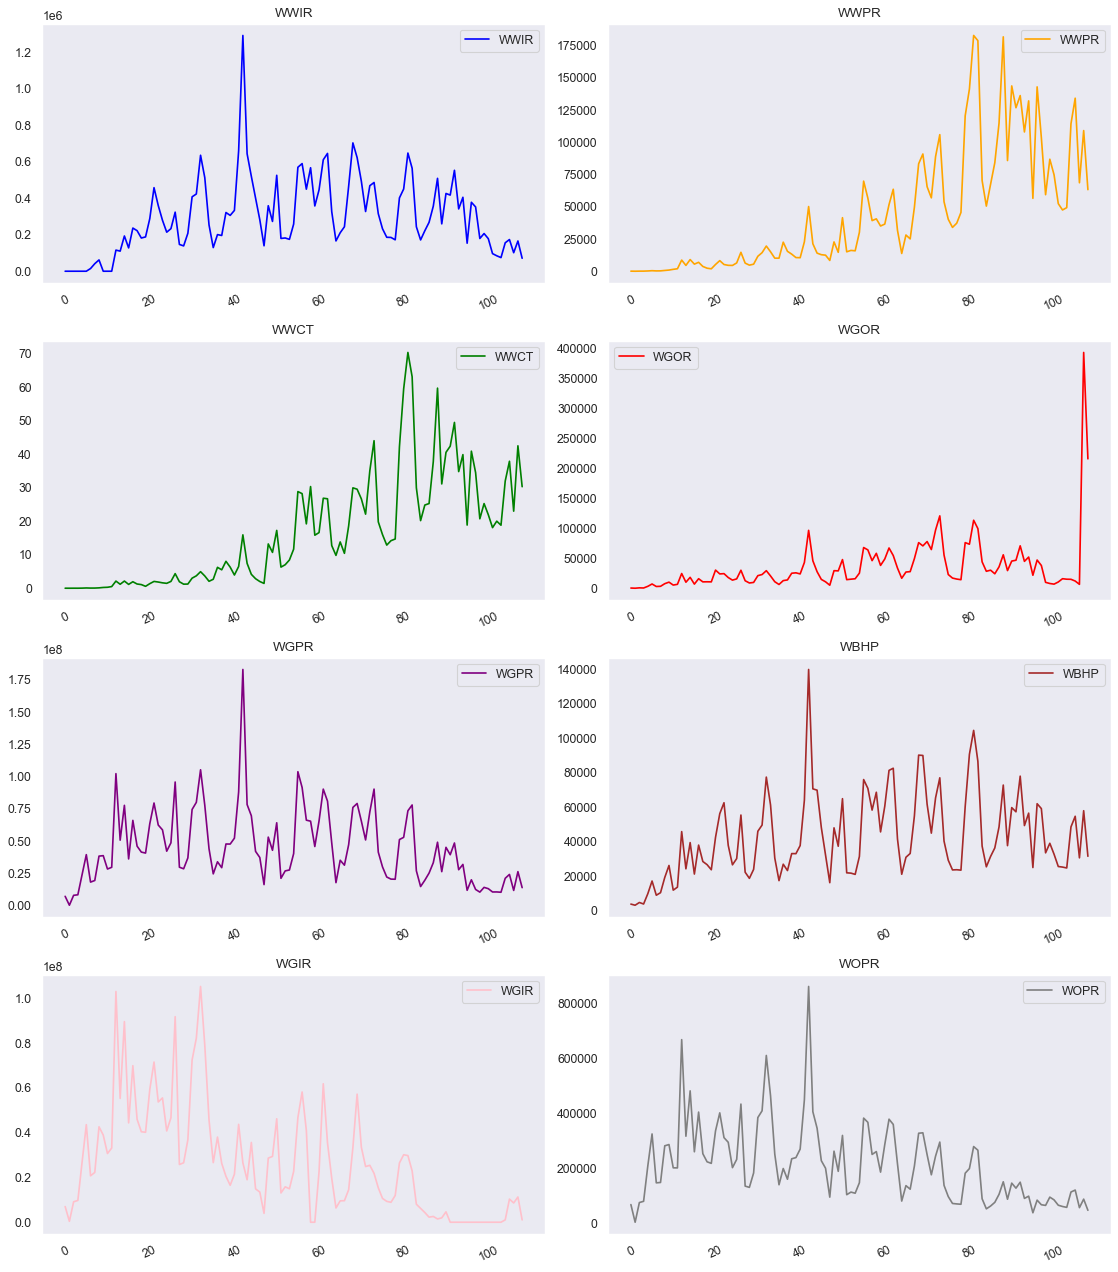

In [35]:
Visualize(dataset)

In [36]:
for i in range(len(df.columns)):
  result = adfuller(df[df.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is not Stationary'.format(df.columns[i]))
  else:
    print('{} - Series is Stationary'.format(df.columns[i]))

WWIR - Series is not Stationary
WWPR - Series is not Stationary
WWCT - Series is not Stationary
WGOR - Series is not Stationary
WGPR - Series is Stationary
WBHP - Series is not Stationary
WGIR - Series is not Stationary
number - Series is Stationary
WOPR - Series is not Stationary


In [37]:
for i in range(len(dataset.columns)):
  result = adfuller(dataset[dataset.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is not Stationary'.format(dataset.columns[i]))
  else:
    print('{} - Series is Stationary'.format(dataset.columns[i]))
    


WWIR - Series is Stationary
WWPR - Series is not Stationary
WWCT - Series is not Stationary
WGOR - Series is Stationary
WGPR - Series is Stationary
WBHP - Series is Stationary
WGIR - Series is not Stationary
WOPR - Series is Stationary


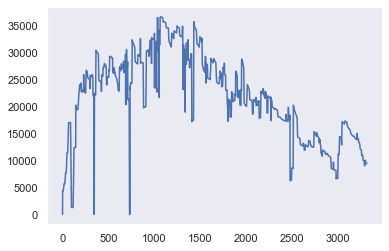

In [38]:
WOPR1 = df['WOPR']
WOPR2 = dataset['WOPR']

plt.plot(WOPR1)

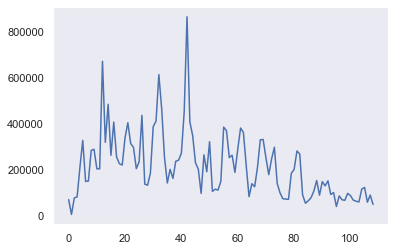

In [39]:
plt.plot(WOPR2)

In [40]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

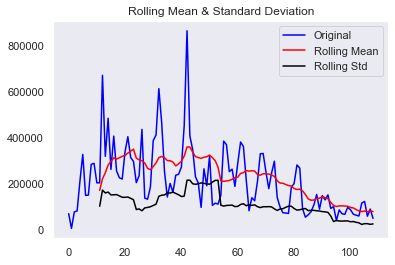

Results of Dickey-Fuller Test:
Test Statistic                  -3.484386
p-value                          0.008397
#Lags Used                       3.000000
Number of Observations Used    105.000000
Critical Value (1%)             -3.494220
Critical Value (5%)             -2.889485
Critical Value (10%)            -2.581676
dtype: float64


In [41]:
test_stationarity(dataset['WOPR'])

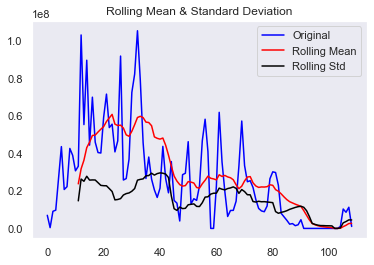

Results of Dickey-Fuller Test:
Test Statistic                  -1.939468
p-value                          0.313728
#Lags Used                       4.000000
Number of Observations Used    104.000000
Critical Value (1%)             -3.494850
Critical Value (5%)             -2.889758
Critical Value (10%)            -2.581822
dtype: float64


In [42]:
test_stationarity(dataset['WGIR'])

# tak inputi

In [43]:
dataset1= dataset['WOPR']
dataset1 = pd.DataFrame(dataset1)
dataset1

,WOPR
0,68097.363400
1,3869.360910
2,75532.210300
3,80114.726400
4,209729.064200
...,...
104,114037.787076
105,121096.901286
106,56919.785966
107,87994.715649


Text(0.5, 1.0, 'ACF for prices , size=20')

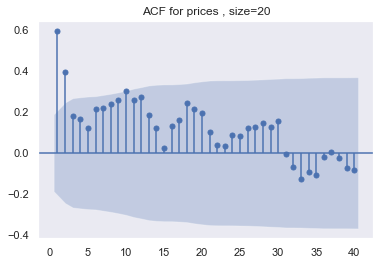

In [44]:
#The ACF
sgt.plot_acf(dataset.WOPR, zero=False, lags=40)
plt.title('ACF for prices , size=20')

In [45]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], X.shape[1],1 )
    model = Sequential()
    model.add(GRU(neurons[0], batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True,return_sequences=True))
    model.add(Dropout(0.5))
    model.add(GRU(neurons[1], batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True,return_sequences=True))
    model.add(Dropout(0.5))
    model.add(GRU(neurons[2], batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True,return_sequences=True))
    model.add(Dropout(0.5))
    model.add(GRU(neurons[3], batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True,return_sequences=True))
    model.add(Dropout(0.5))
    #model.add(Dense(neurons[4],'sigmoid', return_sequences=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='Adam')
    for i in range(nb_epoch):
        print('epoch:',i+1)
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    return model
    


# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, len(X), 1)
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataset = np.insert(dataset,[0]*look_back,0)    
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    dataY= np.array(dataY)        
    dataY = np.reshape(dataY,(dataY.shape[0],1))
    dataset = np.concatenate((dataX,dataY),axis=1)  
    return dataset


# compute RMSPE
def RMSPE(x,y):
    result=0
    for i in range(len(x)):
        result += ((x[i]-y[i])/x[i])**2
    result /= len(x)
    result = sqrt(result)
    result *= 100
    return result

# compute MAPE
def MAPE(x,y):
    result=0
    for i in range(len(x)):
        result += abs((x[i]-y[i])/x[i])
    result /= len(x)
    result *= 100
    return result


def experiment(series,look_back,neurons,n_epoch):

    raw_values = series.values
    # transform data to be stationary
    diff = difference(raw_values, 1)
    

    # create dataset x,y
    dataset = diff.values
    dataset = create_dataset(dataset,look_back)


    # split into train and test sets
    train_size = int(dataset.shape[0] * 0.8)
    test_size = dataset.shape[0] - train_size
    train, test = dataset[0:train_size], dataset[train_size:]


    # transform the scale of the data
    scaler, train_scaled, test_scaled = scale(train, test)



    # fit the model
    lstm_model = fit_lstm(train_scaled, 1, n_epoch, neurons)
    # forecast the entire training dataset to build up state for forecasting
    print('Forecasting Training Data')   
    predictions_train = list()
    for i in range(len(train_scaled)):
        # make one-step forecast
        X, y = train_scaled[i, 0:-1], train_scaled[i, -1]
        yhat = forecast_lstm(lstm_model, 1, X)
        # invert scaling
        yhat = invert_scale(scaler, X, yhat)
        # invert differencing
        yhat = inverse_difference(raw_values, yhat, len(raw_values)-i)
        # store forecast
        predictions_train.append(yhat)
         



    # forecast the test data
    print('Forecasting Testing Data')
    predictions_test = list()
    for i in range(len(test_scaled)):
        # make one-step forecast
        X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
        yhat = forecast_lstm(lstm_model, 1, X)
        # invert scaling
        yhat = invert_scale(scaler, X, yhat)
        # invert differencing
        yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
        # store forecast
        predictions_test.append(yhat)
        expected = raw_values[len(train) + i + 1]
        print('Number%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
    
    # report performance using RMSE
    #rmse_test = sqrt(mean_squared_error(raw_values[-len(test_scaled):], predictions_test))
    #print('Test RMSE: %.4f' % rmse_test)
    #report performance using RMSPE
    rmspe_test = RMSPE(raw_values[-len(test_scaled):],predictions_test)
    print('Test RMSPE: %.4f' % rmspe_test)
    #MAE_test = mean_absolute_error(raw_values[-len(test_scaled):], predictions_test)
    #print('Test MAE: %.5f' % MAE_test)
    MAPE_test = MAPE(raw_values[-len(test_scaled):], predictions_test)
    print('Test MAPE: %.5f' % MAPE_test)
    
    predictions = np.concatenate((predictions_train,predictions_test),axis=0)

    # line plot of observed vs predicted
    fig, ax = plt.subplots(1)
    ax.plot(raw_values, label='original', color='blue')
    ax.plot(predictions, label='predictions', color='red')
    ax.axvline(x=len(train_scaled)+1,color='k', linestyle='--')
    ax.legend(loc='upper right')
    ax.set_xlabel('Time',fontsize = 16)
    ax.set_ylabel('oil production ',fontsize = 16)
    plt.show()

    


epoch: 1
86/86 [==============================] - 0s 3ms/step - loss: 0.0966
epoch: 2
86/86 [==============================] - 0s 3ms/step - loss: 0.0997
epoch: 3
86/86 [==============================] - 0s 3ms/step - loss: 0.0957
epoch: 4
86/86 [==============================] - 0s 4ms/step - loss: 0.0953
epoch: 5
86/86 [==============================] - 0s 3ms/step - loss: 0.0975
epoch: 6
86/86 [==============================] - 0s 4ms/step - loss: 0.0968
epoch: 7
86/86 [==============================] - 0s 4ms/step - loss: 0.0914
epoch: 8
86/86 [==============================] - 0s 4ms/step - loss: 0.0955
epoch: 9
86/86 [==============================] - 0s 4ms/step - loss: 0.0902
epoch: 10
86/86 [==============================] - 0s 4ms/step - loss: 0.0916
epoch: 11
86/86 [==============================] - 0s 4ms/step - loss: 0.0974
epoch: 12
86/86 [==============================] - 0s 4ms/step - loss: 0.0928
epoch: 13
86/86 [==============================] - 0s 3ms/step - loss: 0.

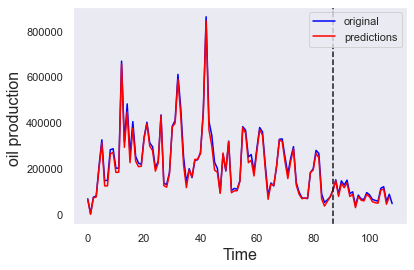

In [46]:
def run():

    #load dataset
    
    dataset1= dataset['WOPR']
    dataset1 = pd.DataFrame(dataset1)
    
    look_back= 2
    neurons=[6,6,6,6]
    n_epoch=50
    experiment(dataset1,look_back,neurons,n_epoch)

run()

In [47]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]





# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataset = np.insert(dataset,[0]*look_back,0)    
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    dataY= np.array(dataY)        
    dataY = np.reshape(dataY,(dataY.shape[0],1))
    dataset = np.concatenate((dataX,dataY),axis=1)  
    return dataset


# compute RMSPE
def RMSPE(x,y):
    result=0
    for i in range(len(x)):
        result += ((x[i]-y[i])/x[i])**2
    result /= len(x)
    result = sqrt(result)
    result *= 100
    return result

# compute MAPE
def MAPE(x,y):
    result=0
    for i in range(len(x)):
        result += abs((x[i]-y[i])/x[i])
    result /= len(x)
    result *= 100
    return result


def fit_DNN(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], X.shape[1],1 )
    model = Sequential()
    model.add(Dense(neurons[0], 'sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(neurons[1], 'sigmoid', ))
    model.add(Dropout(0.3))
    model.add(Dense(neurons[2],'sigmoid' ))
    model.add(Dropout(0.3))
    model.add(Dense(neurons[3],'sigmoid' ))
    model.add(Dropout(0.5))
    model.add(Dense(neurons[4],'sigmoid'))
    
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        print('epoch:',i+1)
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    return model
    
# make a one-step forecast
def forecast_DNN(model, batch_size, X):
    X = X.reshape(1, len(X), 1)
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

def experiment(series,look_back,neurons,n_epoch):

    raw_values = series.values
    # transform data to be stationary
    diff = difference(raw_values, 1)
    

    # create dataset x,y
    dataset = diff.values
    dataset = create_dataset(dataset,look_back)


    # split into train and test sets
    train_size = int(dataset.shape[0] * 0.8)
    test_size = dataset.shape[0] - train_size
    train, test = dataset[0:train_size], dataset[train_size:]


    # transform the scale of the data
    scaler, train_scaled, test_scaled = scale(train, test)



    # fit the model
    DNN_model = fit_DNN(train_scaled, 1, n_epoch, neurons)
    # forecast the entire training dataset to build up state for forecasting
    print('Forecasting Training Data')   
    predictions_train = list()
    for i in range(len(train_scaled)):
        # make one-step forecast
        X, y = train_scaled[i, 0:-1], train_scaled[i, -1]
        yhat = forecast_DNN(DNN_model, 1, X)
        # invert scaling
        yhat = invert_scale(scaler, X, yhat)
        # invert differencing
        yhat = inverse_difference(raw_values, yhat, len(raw_values)-i)
        # store forecast
        predictions_train.append(yhat)
        #expected = raw_values[ i+1 ] 
        #print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

    # forecast the test data
    print('Forecasting Testing Data')
    predictions_test = list()
    for i in range(len(test_scaled)):
        # make one-step forecast
        X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
        yhat = forecast_DNN(DNN_model, 1, X)
        # invert scaling
        yhat = invert_scale(scaler, X, yhat)
        # invert differencing
        yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
        # store forecast
        predictions_test.append(yhat)
        expected = raw_values[len(train) + i + 1]
        print('Number%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

    # report performance using RMSE
    
    #report performance using RMSPE
    rmspe_test = RMSPE(raw_values[-len(test_scaled):],predictions_test)
    print('Test RMSPE: %.4f' % rmspe_test)
   
    MAPE_test = MAPE(raw_values[-len(test_scaled):], predictions_test)
    print('Test MAPE: %.5f' % MAPE_test)

    predictions = np.concatenate((predictions_train,predictions_test),axis=0)

    # line plot of observed vs predicted
    fig, ax = plt.subplots(1)
    ax.plot(raw_values, label='original', color='blue')
    ax.plot(predictions, label='predictions', color='red')
    ax.axvline(x=len(train_scaled)+1,color='k', linestyle='--')
    ax.legend(loc='upper right')
    ax.set_xlabel('Time',fontsize = 16)
    ax.set_ylabel('oil production ',fontsize = 16)
    plt.show()
    return raw_values, predictions

epoch: 1
86/86 [==============================] - 0s 1ms/step - loss: 0.1005
epoch: 2
86/86 [==============================] - 0s 1ms/step - loss: 0.0895
epoch: 3
86/86 [==============================] - 0s 1ms/step - loss: 0.0990
epoch: 4
86/86 [==============================] - 0s 1ms/step - loss: 0.1046
epoch: 5
86/86 [==============================] - 0s 1ms/step - loss: 0.1045
epoch: 6
86/86 [==============================] - 0s 951us/step - loss: 0.0940
epoch: 7
86/86 [==============================] - 0s 1ms/step - loss: 0.1033
epoch: 8
86/86 [==============================] - 0s 1ms/step - loss: 0.1023
epoch: 9
86/86 [==============================] - 0s 1ms/step - loss: 0.0947
epoch: 10
86/86 [==============================] - 0s 823us/step - loss: 0.1035
Forecasting Training Data
Forecasting Testing Data
Number1, Predicted=76735.260424, Expected=105502.199760
Number2, Predicted=105891.411874, Expected=151249.086561
Number3, Predicted=151638.009465, Expected=87638.681844
Numbe

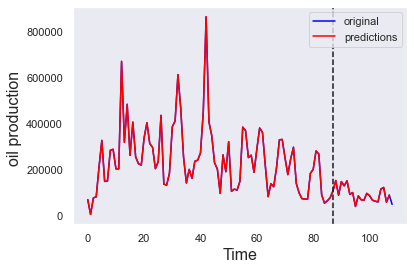

In [48]:
def run():

    #load dataset
    
    dataset1= dataset['WOPR']
    dataset1 = pd.DataFrame(dataset1)
    
    
    look_back= 1
    neurons=[ 10 ,20,20,10,15]
    n_epoch=10
    experiment(dataset1,look_back,neurons,n_epoch)

run()

In [49]:
# selected data for input :  WWIR WGPR WBHP
# output is WOPR

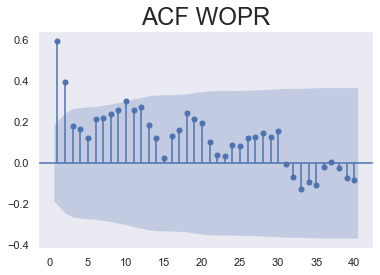

In [50]:
sgt.plot_acf(dataset.WOPR, lags=40, zero=False)
plt.title('ACF WOPR', size =24)
plt.show()

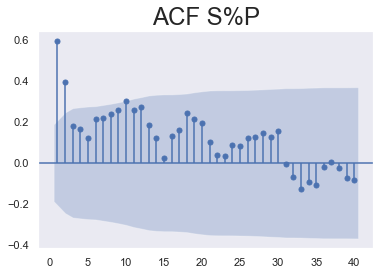

In [51]:
sgt.plot_acf(dataset.WOPR, lags=40, zero=False)
plt.title('ACF S%P', size =24)
plt.show()

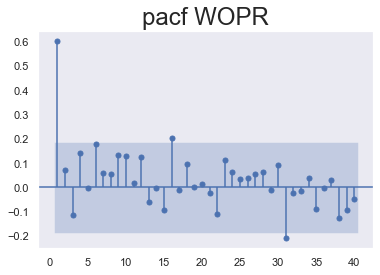

In [52]:
# partial autocorrelation function (pacf)
# ols: order of leas squares
# pacf X(t-2) ---> X(t)
# cancel out X(t-2) ---> X(t-1)  ---> X(t)     
            # X(t-2) --->X(t)
# acf   X(t-2) --> X(t-1) -->X(t)
sgt.plot_pacf(dataset.WOPR, lags=40, zero=False, method = ('ols'))
plt.title('pacf WOPR' , size=24)
plt.show()

# AR Model

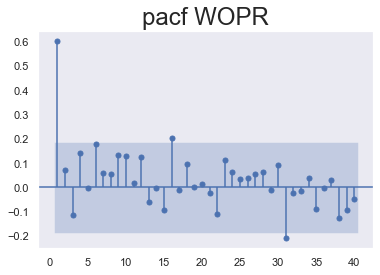

In [53]:
sgt.plot_pacf(dataset.WOPR, lags=40, zero=False, method = ('ols'))
plt.title('pacf WOPR', size=24)
plt.show()

In [54]:
# The AR(1) Model
model_ar1 = ARMA(dataset.WOPR, order=(1,0))  #1:the num of past values we wish to incorporate into the model
                                                #2:not taking any of the residual values into consideration
result_ar1 = model_ar1.fit()
result_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   WOPR   No. Observations:                  109
Model:                     ARMA(1, 0)   Log Likelihood               -1423.543
Method:                       css-mle   S.D. of innovations         113437.467
Date:                Sat, 08 May 2021   AIC                           2853.086
Time:                        01:58:09   BIC                           2861.160
Sample:                             0   HQIC                          2856.360
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.135e+05   2.71e+04      7.892      0.000     1.6e+05    2.67e+05
ar.L1.WOPR     0.6038      0.077      7.889      0.000       0.454       0.754
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6563           +0.0000j            1.6563            0.0000
-----------------------------------------------------------------------------
"""

In [55]:
model_ar2 = ARMA(dataset.WOPR, order=(12,0))
results_ar2 = model_ar2.fit()
results_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   WOPR   No. Observations:                  109
Model:                    ARMA(12, 0)   Log Likelihood               -1416.890
Method:                       css-mle   S.D. of innovations         106271.136
Date:                Sat, 08 May 2021   AIC                           2861.779
Time:                        01:58:12   BIC                           2899.458
Sample:                             0   HQIC                          2877.059
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.135e+05   5.75e+04      3.716      0.000    1.01e+05    3.26e+05
ar.L1.WOPR      0.5433      0.095      5.718      0.000       0.357       0.729
ar.L2.WOPR      0.0670      0.108      0.620      0.535      -0.145       0.279
ar.L3.WOPR     -0.1827      0.107     -1.705      0.088      -0.393       0.027
ar.L4.WOPR      0.1187      0.109      1.090      0.276      -0.095       0.332
ar.L5.WOPR     -0.1076      0.109     -0.992      0.321      -0.320       0.105
ar.L6.WOPR      0.1313      0.110      1.198      0.231      -0.084       0.346
ar.L7.WOPR      0.0531      0.111      0.480      0.631      -0.164       0.270
ar.L8.WOPR     -0.0401      0.110     -0.364      0.716      -0.256       0.176
ar.L9.WOPR      0.0846      0.109      0.774      0.439      -0.130       0.299
ar.L10.WOPR     0.1067      0.107      0.995      0.320      -0.104       0.317
ar.L11.WOPR    -0.0467      0.107     -0.436      0.663      -0.257       0.163
ar.L12.WOPR     0.1169      0.095      1.236      0.216      -0.068       0.302
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.1336           -0.0000j            1.1336           -0.5000
AR.2            -1.0708           -0.5938j            1.2244           -0.4194
AR.3            -1.0708           +0.5938j            1.2244            0.4194
AR.4            -0.4596           -1.0909j            1.1838           -0.3135
AR.5            -0.4596           +1.0909j            1.1838            0.3135
AR.6             1.0370           -0.0000j            1.0370           -0.0000
AR.7             0.9554           -0.6105j            1.1338           -0.0905
AR.8             0.9554           +0.6105j            1.1338            0.0905
AR.9             0.6613           -1.0339j            1.2272           -0.1594
AR.10            0.6613           +1.0339j            1.2272            0.1594
AR.11            0.1619           -1.3277j            1.3376           -0.2307
AR.12            0.1619           +1.3277j            1.3376            0.2307
------------------------------------------------------------------------------
"""

In [56]:
# Higher-lag AR Model
model_ar15 = ARMA(dataset.WOPR, order=(15,0))
results_ar15 = model_ar15.fit()
results_ar15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   WOPR   No. Observations:                  109
Model:                    ARMA(15, 0)   Log Likelihood               -1415.801
Method:                       css-mle   S.D. of innovations         105067.728
Date:                Sat, 08 May 2021   AIC                           2865.602
Time:                        01:58:24   BIC                           2911.355
Sample:                             0   HQIC                          2884.156
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.135e+05    4.7e+04      4.544      0.000    1.21e+05    3.06e+05
ar.L1.WOPR      0.5546      0.095      5.817      0.000       0.368       0.741
ar.L2.WOPR      0.0602      0.109      0.555      0.579      -0.152       0.273
ar.L3.WOPR     -0.1495      0.108     -1.382      0.167      -0.362       0.063
ar.L4.WOPR      0.1327      0.109      1.221      0.222      -0.080       0.346
ar.L5.WOPR     -0.0988      0.109     -0.909      0.364      -0.312       0.114
ar.L6.WOPR      0.1425      0.109      1.309      0.191      -0.071       0.356
ar.L7.WOPR      0.0673      0.110      0.611      0.541      -0.148       0.283
ar.L8.WOPR     -0.0472      0.110     -0.428      0.668      -0.263       0.169
ar.L9.WOPR      0.1101      0.110      1.000      0.318      -0.106       0.326
ar.L10.WOPR     0.0727      0.110      0.660      0.510      -0.143       0.289
ar.L11.WOPR    -0.0282      0.110     -0.256      0.798      -0.244       0.188
ar.L12.WOPR     0.1375      0.111      1.244      0.214      -0.079       0.354
ar.L13.WOPR    -0.0830      0.122     -0.681      0.496      -0.322       0.156
ar.L14.WOPR     0.0589      0.124      0.476      0.634      -0.184       0.301
ar.L15.WOPR    -0.1304      0.108     -1.213      0.225      -0.341       0.080
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.8899           -0.6078j            1.0776           -0.0954
AR.2             0.8899           +0.6078j            1.0776            0.0954
AR.3             1.1654           -0.0000j            1.1654           -0.0000
AR.4             1.1052           -0.0000j            1.1052           -0.0000
AR.5             0.6002           -0.9457j            1.1201           -0.1600
AR.6             0.6002           +0.9457j            1.1201            0.1600
AR.7            -1.0688           -0.0000j            1.0688           -0.5000
AR.8            -1.0073           -0.4753j            1.1138           -0.4298
AR.9            -1.0073           +0.4753j            1.1138            0.4298
AR.10            0.1885           -1.1774j            1.1923           -0.2247
AR.11            0.1885           +1.1774j            1.1923            0.2247
AR.12           -0.7036           -1.0175j            1.2371           -0.3463
AR.13           -0.7036           +1.0175j            1.2371            0.3463
AR.14           -0.3428           -1.1398j            1.1902           -0.2965
AR.15           -0.3428           +1.1398j            1.1902            0.2965
------------------------------------------------------------------------------
"""

In [57]:
# LLR Test
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (1*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [58]:
LLR_test(model_ar1, model_ar2)

0.01

Text(0.5, 1.0, 'RSS: 1246710003644.4219')

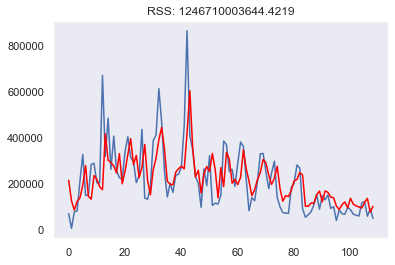

In [59]:
plt.plot(dataset.WOPR)
plt.plot(results_ar2.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ar2.fittedvalues-dataset.WOPR)**2))

# MA Model

In [60]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
import tensorflow as tf


register_matplotlib_converters()

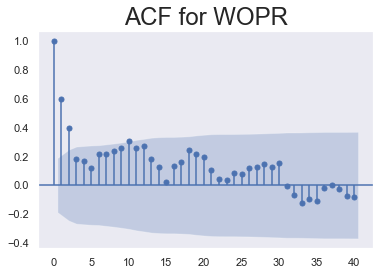

In [61]:
sgt.plot_acf(dataset.WOPR,lags=40)
plt.title('ACF for WOPR', size=24)
plt.show()

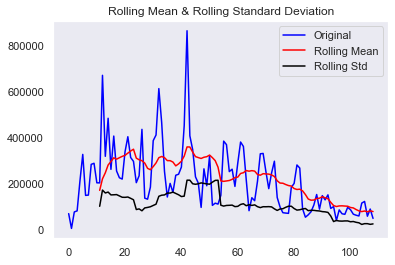

In [62]:
rolling_mean = dataset.WOPR.rolling(window = 12).mean()
rolling_std = dataset.WOPR.rolling(window = 12).std()
plt.plot(dataset.WOPR, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [63]:
model_ma_1 = ARMA(dataset.WOPR,order=(0,1))
results_ma_1 = model_ma_1.fit()
results_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   WOPR   No. Observations:                  109
Model:                     ARMA(0, 1)   Log Likelihood               -1432.400
Method:                       css-mle   S.D. of innovations         123185.009
Date:                Sat, 08 May 2021   AIC                           2870.800
Time:                        01:58:34   BIC                           2878.874
Sample:                             0   HQIC                          2874.074
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.135e+05   1.67e+04     12.755      0.000    1.81e+05    2.46e+05
ma.L1.WOPR     0.4225      0.064      6.627      0.000       0.298       0.548
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -2.3666           +0.0000j            2.3666            0.5000
-----------------------------------------------------------------------------
"""

In [64]:
model_ma_2 = ARMA(dataset.WOPR,order=(0,2))
results_ma_2 = model_ma_2.fit()
results_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   WOPR   No. Observations:                  109
Model:                     ARMA(0, 2)   Log Likelihood               -1423.646
Method:                       css-mle   S.D. of innovations         113540.257
Date:                Sat, 08 May 2021   AIC                           2855.293
Time:                        01:58:34   BIC                           2866.058
Sample:                             0   HQIC                          2859.658
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.135e+05   2.08e+04     10.248      0.000    1.73e+05    2.54e+05
ma.L1.WOPR     0.5776      0.095      6.108      0.000       0.392       0.763
ma.L2.WOPR     0.3497      0.075      4.661      0.000       0.203       0.497
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.8260           -1.4757j            1.6911           -0.3312
MA.2           -0.8260           +1.4757j            1.6911            0.3312
-----------------------------------------------------------------------------
"""

In [65]:
model_ma_3 = ARMA(dataset.WOPR,order=(0,3))
results_ma_3 = model_ma_3.fit()
results_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   WOPR   No. Observations:                  109
Model:                     ARMA(0, 3)   Log Likelihood               -1423.290
Method:                       css-mle   S.D. of innovations         113173.488
Date:                Sat, 08 May 2021   AIC                           2856.580
Time:                        01:58:34   BIC                           2870.037
Sample:                             0   HQIC                          2862.037
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.135e+05   2.21e+04      9.674      0.000     1.7e+05    2.57e+05
ma.L1.WOPR     0.5729      0.095      6.034      0.000       0.387       0.759
ma.L2.WOPR     0.3930      0.092      4.279      0.000       0.213       0.573
ma.L3.WOPR     0.0844      0.099      0.857      0.391      -0.109       0.278
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.4846           -1.7258j            1.7926           -0.2936
MA.2           -0.4846           +1.7258j            1.7926            0.2936
MA.3           -3.6860           -0.0000j            3.6860           -0.5000
-----------------------------------------------------------------------------
"""

In [66]:
model_ma_15 = ARMA(dataset.WOPR,order=(0,15))
results_ma_15 = model_ma_15.fit()
results_ma_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   WOPR   No. Observations:                  109
Model:                    ARMA(0, 15)   Log Likelihood               -1414.797
Method:                       css-mle   S.D. of innovations         103094.375
Date:                Sat, 08 May 2021   AIC                           2863.593
Time:                        01:58:51   BIC                           2909.346
Sample:                             0   HQIC                          2882.148
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.135e+05   3.89e+04      5.482      0.000    1.37e+05     2.9e+05
ma.L1.WOPR      0.5575      0.103      5.410      0.000       0.356       0.760
ma.L2.WOPR      0.3347      0.118      2.830      0.005       0.103       0.567
ma.L3.WOPR      0.0625      0.121      0.515      0.607      -0.176       0.301
ma.L4.WOPR      0.0841      0.118      0.712      0.476      -0.147       0.316
ma.L5.WOPR     -0.0017      0.108     -0.015      0.988      -0.213       0.210
ma.L6.WOPR      0.1454      0.097      1.504      0.133      -0.044       0.335
ma.L7.WOPR      0.1443      0.102      1.419      0.156      -0.055       0.344
ma.L8.WOPR      0.1487      0.107      1.394      0.163      -0.060       0.358
ma.L9.WOPR      0.2179      0.129      1.692      0.091      -0.035       0.470
ma.L10.WOPR     0.3298      0.133      2.473      0.013       0.068       0.591
ma.L11.WOPR     0.3000      0.138      2.178      0.029       0.030       0.570
ma.L12.WOPR     0.3829      0.146      2.630      0.009       0.098       0.668
ma.L13.WOPR     0.3038      0.133      2.283      0.022       0.043       0.565
ma.L14.WOPR     0.1917      0.134      1.429      0.153      -0.071       0.455
ma.L15.WOPR    -0.1034      0.114     -0.907      0.364      -0.327       0.120
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
MA.1            -1.0608           -0.2652j            1.0935           -0.4610
MA.2            -1.0608           +0.2652j            1.0935            0.4610
MA.3            -0.8682           -0.6595j            1.0902           -0.3966
MA.4            -0.8682           +0.6595j            1.0902            0.3966
MA.5            -0.6060           -0.9336j            1.1130           -0.3416
MA.6            -0.6060           +0.9336j            1.1130            0.3416
MA.7            -0.1398           -1.0678j            1.0769           -0.2707
MA.8            -0.1398           +1.0678j            1.0769            0.2707
MA.9             0.2951           -1.0589j            1.0993           -0.2067
MA.10            0.2951           +1.0589j            1.0993            0.2067
MA.11            0.9648           -0.3240j            1.0178           -0.0516
MA.12            0.9648           +0.3240j            1.0178            0.0516
MA.13            0.7231           -0.8039j            1.0813           -0.1334
MA.14            0.7231           +0.8039j            1.0813            0.1334
MA.15            3.2371           -0.0000j            3.2371           -0.0000
------------------------------------------------------------------------------
"""

Text(0.5, 1.0, 'RSS: 1403511129268.4875')

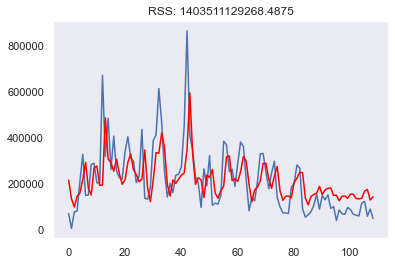

In [67]:
plt.plot(dataset.WOPR)
plt.plot(results_ma_3.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ma_3.fittedvalues-dataset.WOPR)**2))

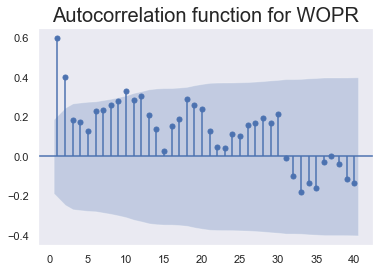

In [68]:
# arma
sgt.plot_acf(dataset.WOPR,unbiased=True,zero=False,lags=40)
plt.title('Autocorrelation function for WOPR',size=20)
plt.show()

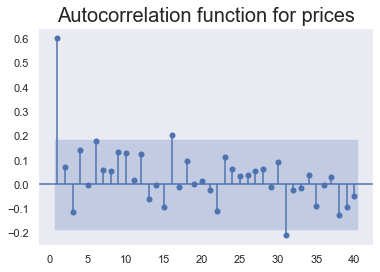

In [69]:
sgt.plot_pacf(dataset.WOPR,zero=False,lags=40, alpha=0.05, method=('ols'))
plt.title('Autocorrelation function for prices',size=20)
plt.show()

In [70]:
model_ar_1_ma_1 =ARMA(dataset.WOPR, order=(1,1))
results_ar_1_ma_1 = model_ar_1_ma_1 .fit()
results_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   WOPR   No. Observations:                  109
Model:                     ARMA(1, 1)   Log Likelihood               -1423.342
Method:                       css-mle   S.D. of innovations         113224.271
Date:                Sat, 08 May 2021   AIC                           2854.684
Time:                        01:59:01   BIC                           2865.449
Sample:                             0   HQIC                          2859.049
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.135e+05   2.87e+04      7.442      0.000    1.57e+05     2.7e+05
ar.L1.WOPR     0.6609      0.112      5.902      0.000       0.441       0.880
ma.L1.WOPR    -0.0885      0.141     -0.627      0.531      -0.365       0.188
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5130           +0.0000j            1.5130            0.0000
MA.1           11.3010           +0.0000j           11.3010            0.0000
-----------------------------------------------------------------------------
"""

In [71]:
model_ar_2_ma_3 =ARMA(dataset.WOPR, order=(2,3))
results_ar_2_ma_3 = model_ar_2_ma_3.fit()
results_ar_2_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   WOPR   No. Observations:                  109
Model:                     ARMA(2, 3)   Log Likelihood               -1420.000
Method:                       css-mle   S.D. of innovations         109595.378
Date:                Sat, 08 May 2021   AIC                           2854.000
Time:                        01:59:01   BIC                           2872.839
Sample:                             0   HQIC                          2861.640
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.135e+05   5.37e+04      3.977      0.000    1.08e+05    3.19e+05
ar.L1.WOPR     0.4481      0.304      1.474      0.140      -0.148       1.044
ar.L2.WOPR     0.5010      0.288      1.738      0.082      -0.064       1.066
ma.L1.WOPR     0.0992      0.295      0.337      0.736      -0.479       0.677
ma.L2.WOPR    -0.4170      0.175     -2.388      0.017      -0.759      -0.075
ma.L3.WOPR    -0.3824      0.104     -3.685      0.000      -0.586      -0.179
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0347           +0.0000j            1.0347            0.0000
AR.2           -1.9290           +0.0000j            1.9290            0.5000
MA.1            1.1420           -0.0000j            1.1420           -0.0000
MA.2           -1.1162           -1.0217j            1.5132           -0.3820
MA.3           -1.1162           +1.0217j            1.5132            0.3820
-----------------------------------------------------------------------------
"""

In [72]:
model_ar_3_ma_2 =ARMA(dataset.WOPR, order=(3,2))
results_ar_3_ma_2 = model_ar_3_ma_2.fit()
results_ar_3_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   WOPR   No. Observations:                  109
Model:                     ARMA(3, 2)   Log Likelihood               -1422.132
Method:                       css-mle   S.D. of innovations         111868.037
Date:                Sat, 08 May 2021   AIC                           2858.264
Time:                        01:59:02   BIC                           2877.103
Sample:                             0   HQIC                          2865.904
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.135e+05   5.24e+04      4.077      0.000    1.11e+05    3.16e+05
ar.L1.WOPR     0.4399      0.113      3.903      0.000       0.219       0.661
ar.L2.WOPR     0.9829      0.025     39.168      0.000       0.934       1.032
ar.L3.WOPR    -0.4565      0.104     -4.375      0.000      -0.661      -0.252
ma.L1.WOPR     0.0951      0.064      1.477      0.140      -0.031       0.221
ma.L2.WOPR    -0.9049      0.064    -14.050      0.000      -1.031      -0.779
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0002           +0.0000j            1.0002            0.5000
AR.2            1.0329           +0.0000j            1.0329            0.0000
AR.3            2.1202           +0.0000j            2.1202            0.0000
MA.1           -1.0000           +0.0000j            1.0000            0.5000
MA.2            1.1051           +0.0000j            1.1051            0.0000
-----------------------------------------------------------------------------
"""

Text(0.5, 1.0, 'RSS: 1321003375385.5928')

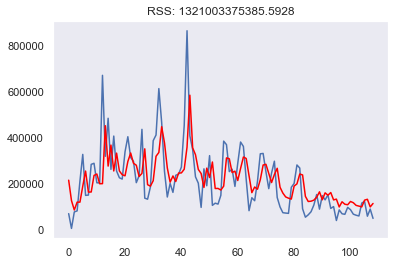

In [75]:
plt.plot(dataset.WOPR)
plt.plot(results_ar_3_ma_2.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ar_2_ma_3.fittedvalues-dataset.WOPR)**2))